# Collections

Collection Categories
- Interfaces that define standard collection protocols
- Ready-to-use collection classes (lists, dictionaries, etc.)
- Base classes for writing application-specific collections


### Enumeration

What makes the ability to Enumeration?  
`IEnumerable` and `IEnumerator`, and their generic counterparts

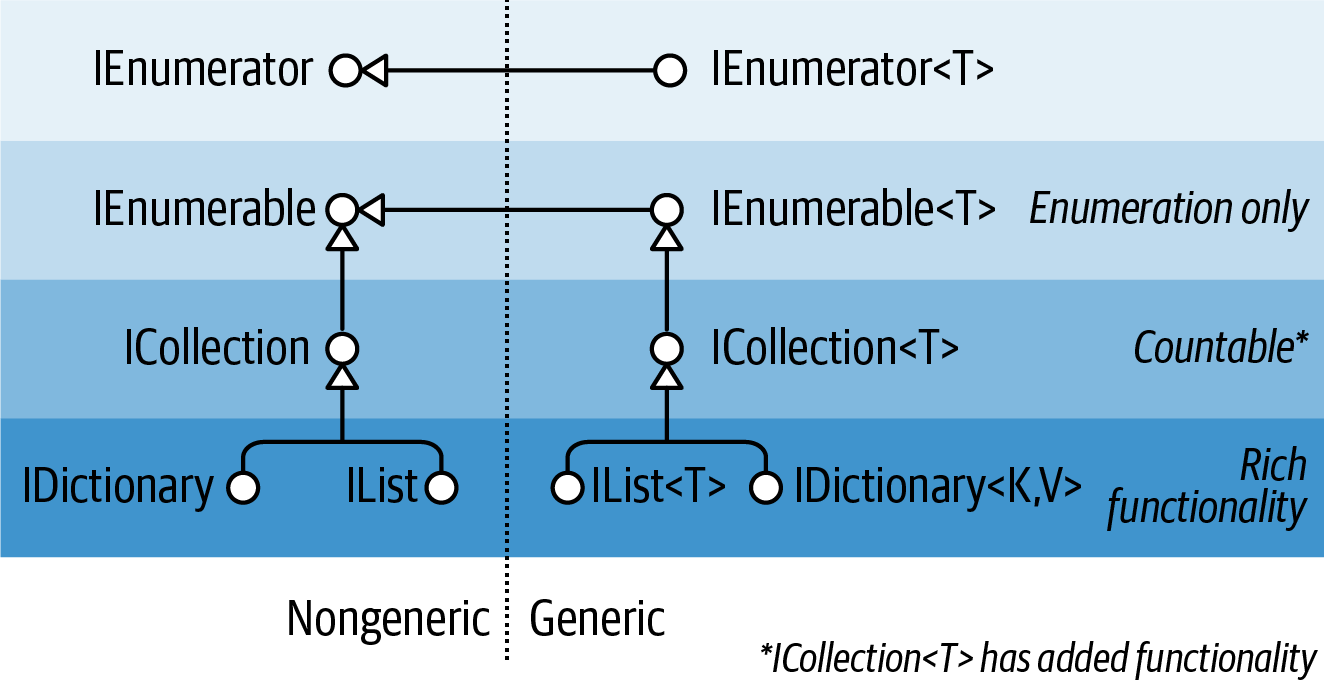

In [ ]:
public interface IEnumerator
{
    bool MoveNext();
    object Current { get; }
    void Reset();
}

In [ ]:
public interface IEnumerable
{
    IEnumerator GetEnumerator();
}

In [ ]:
var address = new Address { City = "kerman", State = "kerman", PostalCode = "123456" };
foreach (var item in address)
    Console.WriteLine(item);

public class Address : IEnumerable
{
    public string City { get; set; } = string.Empty;
    public string State { get; set; } = string.Empty;
    public string PostalCode { get; set; } = string.Empty;

    public IEnumerator GetEnumerator()
    {
        yield return City;
        yield return State;
        yield return PostalCode;
    }
}

So, an object can be `Enumerable` , which implements the `IEnumerable interface`

`foreach` is actually equivalent to the code below

In [ ]:
IEnumerator rator = address.GetEnumerator();

while (rator.MoveNext())
{
    string str = (string) rator.Current;
    Console.WriteLine(str);
}

In [ ]:
//Generic version

public interface IEnumerator<T> : IEnumerator, IDisposable
{
    T Current { get; }
}
public interface IEnumerable<T> : IEnumerable
{
    IEnumerator<T> GetEnumerator();
}

In [ ]:
var address = new AddressGeneric { City = "kerman", State = "kerman", PostalCode = "123456" };
foreach (var item in address)
    Console.WriteLine(item);

public class AddressGeneric : IEnumerable<string>
{
    public string City { get; set; } = string.Empty;
    public string State { get; set; } = string.Empty;
    public string PostalCode { get; set; } = string.Empty;

    // پیاده‌سازی جنریک GetEnumerator که IEnumerator<string> برمی‌گرداند
    public IEnumerator<string> GetEnumerator()
    {
        yield return City;
        yield return State;
        yield return PostalCode;
    }

    // پیاده‌سازی غیرجنریک IEnumerable.GetEnumerator
    // این متد فقط برای سازگاری با IEnumerable است.
    IEnumerator IEnumerable.GetEnumerator()
    {
        // اینجا می‌توانید به سادگی متد جنریک GetEnumerator را فراخوانی کنید
        return this.GetEnumerator();
    }
}


in C#, `array` implement `IEnumerable<T>` by default, where `T` is type of array elements

IEnumerator<T> `inherits` from IDisposable.  

This causes the `IEnumerator` to `release` resources when it is done

### implement IEnumerable<T>

In [ ]:
//1- returning the wrapped collection’s enumerator
public class MyCollection : IEnumerable<int>
{
    private List<int> _innerList = new List<int> { 1, 2, 3, 4, 5 };

    public IEnumerator<int> GetEnumerator()
    {
        return _innerList.GetEnumerator();
    }

    IEnumerator IEnumerable.GetEnumerator()
    {
        return GetEnumerator();
    }
}


In [ ]:
//2- Via an iterator using yield return
public class MyNumbers : IEnumerable<int>
{
    public IEnumerator<int> GetEnumerator()
    {
        for (int i = 0; i < 5; i++)
        {
            yield return i;
        }
    }

    IEnumerator IEnumerable.GetEnumerator()
    {
        return GetEnumerator();
    }
}

In [ ]:
//3- By instantiating your own IEnumerator/IEnumerator<T> implementation
public class MyCustomCollection : IEnumerable<int>
{
    private int[] _items = { 1, 2, 3, 4, 5 };

    public IEnumerator<int> GetEnumerator()
    {
        return new CustomEnumerator(_items);
    }

    IEnumerator IEnumerable.GetEnumerator()
    {
        return GetEnumerator();
    }

    private class CustomEnumerator : IEnumerator<int>
    {
        private int[] _items;
        private int _position = -1;

        public CustomEnumerator(int[] items)
        {
            _items = items;
        }

        public int Current
        {
            get
            {
                return _items[_position];
            }
        }

        object IEnumerator.Current => Current;

        public void Dispose() { }

        public bool MoveNext()
        {
            _position++;
            return (_position < _items.Length);
        }

        public void Reset()
        {
            _position = -1;
        }
    }
}

## The ICollection and IList Interfaces 351

`IEnumerable<T>` (and IEnumerable)
Provides minimum functionality (`enumeration only`)

`ICollection<T>` (and ICollection)
Provides medium functionality (e.g., the `Count` property)

`IList<T>/IDictionary<K,V>` and their nongeneric versions
Provide maximum functionality (including `random` access by `index/key`)

In [ ]:
// difference between generic and nongeneric

public static void NonGenericListExample()
{
    IList list = new ArrayList();
    list.Add(1); // اضافه کردن یک عدد صحیح
    list.Add("string"); // اضافه کردن یک رشته
    list.Add(new DateTime(2024, 1, 1)); // اضافه کردن یک تاریخ

    foreach (var item in list)
    {
        Console.WriteLine($"{item} - Type: {item.GetType().Name}");
    }
}

public static void GenericListExample()
{
    IList<int> list = new List<int>();
    list.Add(1); // اضافه کردن یک عدد صحیح
    // list.Add("string"); // خطا: نوع string با نوع مورد انتظار int مطابقت ندارد
    // list.Add(new DateTime(2024, 1, 1)); // خطا: نوع DateTime با نوع مورد انتظار int مطابقت ندارد

    foreach (var item in list)
    {
        Console.WriteLine($"{item} - Type: {item.GetType().Name}");
    }
}

`IList<T>` does not extend `IList`, `ICollection<T>` does not extend `ICollection`  
`IDictionary<TKey, TValue>` does not extend `IDictionary`.  

because generics came later.

`IList<T>` inherits from `ICollection<T>`

`Collection<T>` inherits from `IList<T>` , خیلی جالب شد

<div dir="rtl">
ممکن است انتظار داشته باشید که کلاس‌های متناظر با این اینترفیس‌ها، یعنی List<T> و Collection<T>, به ترتیب دارای عملکرد و قابلیت‌های متفاوتی باشند که List<T> پیشرفته‌تر و کامل‌تر از Collection<T> باشد. با این حال، این حتماً صحیح نیست.

</div>

In [ ]:
//all contracts define in System.Collections.Generic
public interface IEnumerable{}
public interface ICollection : IEnumerable{}
public interface IList : ICollection, IEnumerable {}

public interface IEnumerable<out T> : IEnumerable{}
public interface IReadOnlyCollection<out T> : IEnumerable<T>, IEnumerable{}
public interface ICollection<T> : IEnumerable<T>, IEnumerable{}
public interface IReadOnlyList<out T> : IEnumerable<T>, IEnumerable, IReadOnlyCollection<T>{}
public interface IList<T> : ICollection<T>, IEnumerable<T>, IEnumerable{}

In [ ]:
using System.Collections.Generic;

//implemented in System.Collections.ObjectModel
public class List<T> : IList<T>, ICollection<T>, IEnumerable<T>, IEnumerable, IList, ICollection, IReadOnlyList<T>, IReadOnlyCollection<T> {}
public class Collection<T> : ICollection<T>, IEnumerable<T>, IEnumerable, IList<T>, IReadOnlyCollection<T>, IReadOnlyList<T>, ICollection, IList {}

<h3 dir="rtl"> تفاوت بین List<T> , Collection<T> </h3>
<p dir= "rtl">
List<T> بهینه‌سازی شده برای کارایی است. این کلاس برای استفاده مستقیم و به عنوان یک کالکشن دینامیک با دسترسی سریع به عناصر طراحی شده است. List<T> به طور مستقیم روی یک آرایه پیاده‌سازی شده و بهینه‌سازی‌های خاصی برای عملیات‌های افزودن، حذف و دسترسی به عناصر دارد.
</p>

<p dir= "rtl">
Collection<T> به عنوان یک پایه کلاس برای ایجاد کالکشن‌های سفارشی طراحی شده است. این کلاس انعطاف‌پذیری بیشتری نسبت به List<T> دارد زیرا توسعه‌دهندگان می‌توانند رفتارهای پیش‌فرض مانند اضافه کردن، حذف یا به‌روزرسانی عناصر را با اورراید کردن متدهایی مانند InsertItem, RemoveItem, و SetItem تغییر دهند.
</p>

In [ ]:
public interface ICollection<T> : IEnumerable<T>, IEnumerable
{
    int Count { get; }
    bool Contains(T item);
    void CopyTo(T[] array, int arrayIndex);
    bool IsReadOnly { get; }
    void Add(T item);
    bool Remove(T item);
    void Clear();
}

public interface ICollection : IEnumerable
{
    int Count { get; }
    bool IsSynchronized { get; }
    object SyncRoot { get; }
    void CopyTo (Array array, int index);
}

If implementing a `read-only` ICollection<T>, the `Add`, `Remove`, and `Clear` methods should throw a `NotSupportedException`.

In [ ]:
public interface IList<T> : ICollection<T>, IEnumerable<T>, IEnumerable
{
    T this [int index] { get; set; }
    int IndexOf (T item);
    void Insert (int index, T item);
    void RemoveAt (int index);
}

public interface IList : ICollection, IEnumerable
{
    object this[int index] { get; set }
    bool IsFixedSize { get; }
    bool IsReadOnly { get; }
    int Add(object value);
    void Clear();
    bool Contains(object value);
    int IndexOf(object value);
    void Insert(int index, object value);
    void Remove(object value);
    void RemoveAt(int index);
}

`C# arrays` also implement both the generic and nongeneric `ILists` (although the methods that `add` or `remove` elements are hidden via explicit interface implementation and throw a NotSupportedException if called).

In [ ]:
IList list = new int[10];

list.Add(1); // Error: System.NotSupportedException: Collection was of a fixed size.

In [ ]:
public interface IReadOnlyCollection<out T> : IEnumerable<T>, IEnumerable
{
    int Count { get; }
}
public interface IReadOnlyList<out T> : IReadOnlyCollection<T>,
IEnumerable<T>, IEnumerable
{
    T this[int index] { get; }
}

### Covariance and Contravariance

In [4]:
//Covariance

var strings = new List<string>{"one", "two"};
strings.Add("three");

var ilistStrings = (IList<string>)strings;
ilistStrings.Add("four");

//var objectList = (IList<object>) strings;// get InvalidCastException
//why? see below example
//objectList.Add(42); // now we have list of strings and int. this illegal

//but consider below code

var objectSequence = (IEnumerable<object>) strings;


In [ ]:
public interface IEnumerable<out T> : IEnumerable
{
    IEnumerator<T> GetEnumerator();
}

//only key concept is `out`
//runtime is sure, we can not modify this variable

### The Array Class

The `Array class` is the `implicit` base class for all single and multidimensional arrays

Because arrays are so fundamental, C# provides `explicit syntax` for their declaration
and initialization

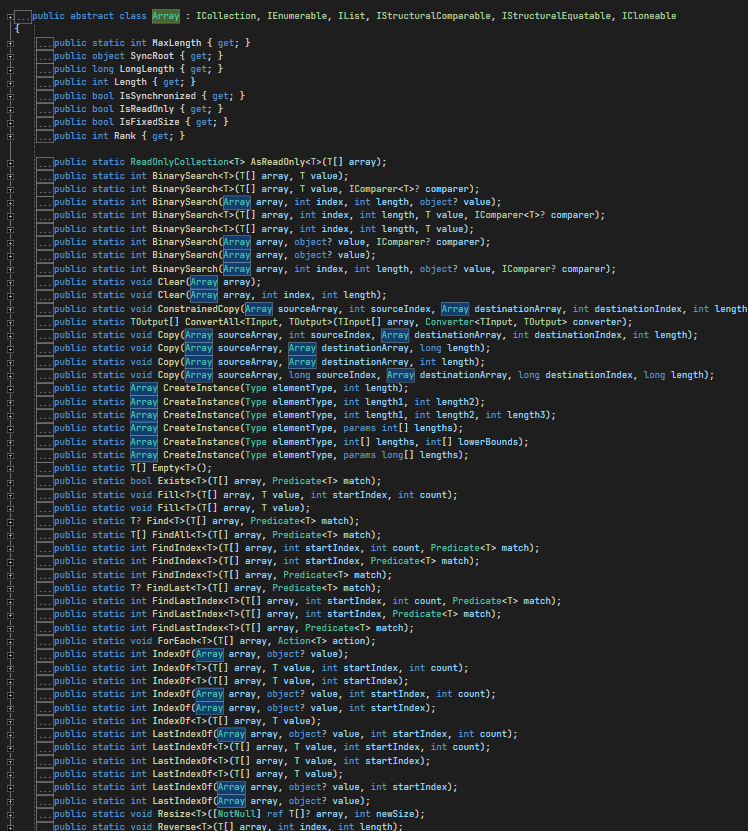

The CLR assigning them a `contiguous space` in memory. This makes indexing into arrays `highly efficient`

<div dir="rtl">
در C#، هنگامی که یک آرایه (array) اعلام می‌شود، Common Language Runtime (CLR) به طور ضمنی یک زیرنوع از کلاس Array ایجاد می‌کند. این عمل با ایجاد یک "پسودوتایپ" (یک نوع موقتی یا مصنوعی) انجام می‌شود که متناسب با ابعاد و انواع عناصر آرایه است. به عبارت دیگر، CLR یک نوع خاص برای آرایه بر اساس نوع داده‌هایی که آرایه نگهداری می‌کند و تعداد ابعاد آن (مانند آرایه‌های یک بعدی، دو بعدی، و غیره) می‌سازد.
</div>

Because Array is a class, arrays are always (themselves) `reference types`—regardless
of the array’s element type.

#### Clone And ShallowClone

arrayB = arrayA.Clone();
If the array contains `value-type` objects, the values themselves are copied; if the array contains `reference type` objects, just the `references` are copied

StringBuilder[] builders2 = builders;

StringBuilder[] shallowClone = (StringBuilder[]) builders.Clone();

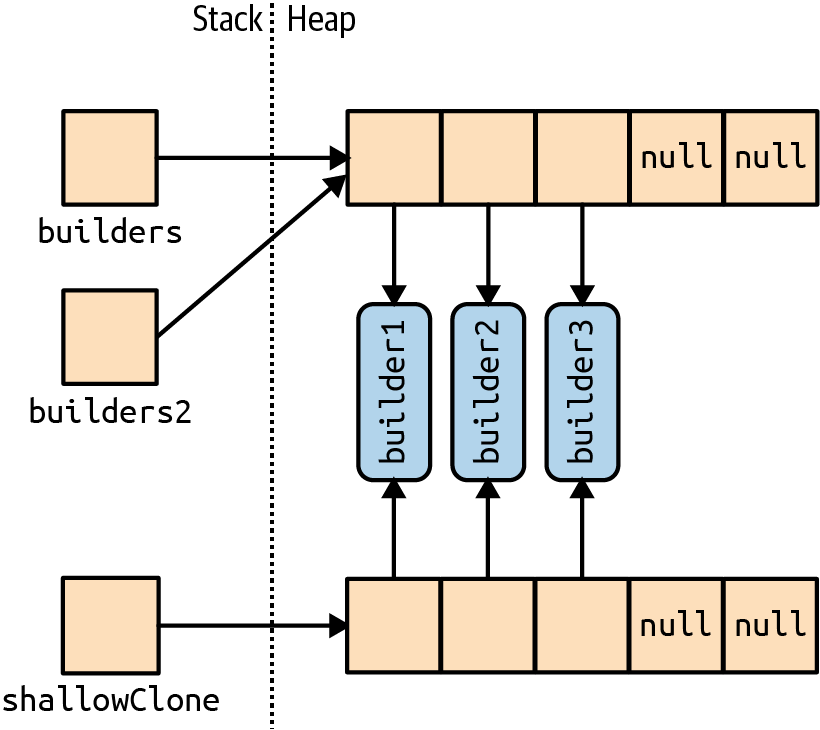

#### Construction and Indexing

In [ ]:
int[] myArray = { 1, 2, 3 };
int first = myArray [0];
int last = myArray [myArray.Length - 1];

// Create a string array 2 elements in length:
Array a = Array.CreateInstance (typeof(string), 2);
a.SetValue ("hi", 0); // → a[0] = "hi";
a.SetValue ("there", 1); // → a[1] = "there";
string s = (string) a.GetValue (0); // → s = a[0];

// We can also cast to a C# array as follows:
string[] cSharpArray = (string[]) a;
string s2 = cSharpArray [0];

In [ ]:
//Enumeration On Array
Array.ForEach (new[] { 1, 2, 3 }, Console.WriteLine);

In [ ]:
int[,] twoD = { {5,6}, {8,9} };

Console.WriteLine(twoD.Length); //return all length
Console.WriteLine(twoD.LongLength); // return length as long


Console.WriteLine(twoD.GetLength(0));
Console.WriteLine(twoD.GetLongLength(1)); // return length as long

Console.WriteLine(twoD.GetLowerBound(0));
Console.WriteLine(twoD.GetUpperBound(1)); // return length as long

In [ ]:
Array myArray = Array.CreateInstance(typeof(int), new int[] { 5 }, new int[] { 1 });
//create nonzero indexed arrays
        for (int i = myArray.GetLowerBound(0); i <= myArray.GetUpperBound(0); i++)
        {
            myArray.SetValue(i + 100, i); // افزودن مقادیر به آرایه (101 تا 105)
        }

        // چاپ محدوده شاخص‌ها و مقادیر آرایه
        Console.WriteLine($"Lower Bound: {myArray.GetLowerBound(0)}");
        Console.WriteLine($"Upper Bound: {myArray.GetUpperBound(0)}");
        for (int i = myArray.GetLowerBound(0); i <= myArray.GetUpperBound(0); i++)
        {
            Console.WriteLine($"Element at index {i}: {myArray.GetValue(i)}");
        }

#### Searching

`BinarySearch`  (just for `ICompare` object) 
  
`IndexOf`/`LastIndex`  
  
`Find`/`FindLast`/`FindIndex`/`FindLastIndex`/`FindAll`/`Exists`/`TrueForAll` this functions get `Predicate<T>` delegate  
  
predicate is simply a
delegate accepting an object and returning true or false:  

`public delegate bool Predicate<T> (T object);`

#### Sorting

In [ ]:
public static void Sort<T> (T[] array){}
public static void Sort (Array array){}

// For sorting a pair of arrays:
public static void Sort<TKey,TValue> (TKey[] keys, TValue[] items){}
public static void Sort (Array keys, Array items){}

In [4]:
int[] numbers = { 3, 2, 1 };
Array.Sort (numbers);

string[] words = { "three", "two", "one" };
Array.Sort (numbers, words);
// numbers array is now { 1, 2, 3 }
// words array is now { "one", "two", "three" }

//Array.Sort requires that the elements in the array implement IComparable
//if If the elements are not intrinsically comparable we can use Comparison delegate:
//here an example that sort an array of integers such that the odd numbers come first
int[] numbers1 = { 1, 2, 3, 4, 5 };
Array.Sort (numbers1, (x, y) => x % 2 == y % 2 ? 0 : x % 2 == 1 ? -1 : 1);

// numbers array is now { 1, 3, 5, 2, 4 }

As an alternative to calling `Sort`, you can use `LINQ’s OrderBy`
and `ThenBy` operators. Unlike `Array.Sort`, the LINQ operators
`don’t alter the original array`, instead emitting the sorted
result in a fresh IEnumerable<T> sequence.

In [ ]:
public static void Reverse (Array array){}
//Reverse part of array
public static void Reverse (Array array, int index, int length){}

#### Copying

<div dir="rtl">

<b>Clone()</b> یک کپی سطحی (Shallow Copy) از آرایه را ایجاد می‌کند. این بدان معناست که اگر آرایه حاوی اشاره‌گرها (References) به شیء‌هایی باشد، فقط اشاره‌گرها کپی می‌شوند نه خود شیء‌ها. 
<br/><br/>

<b>CopyTo()</b> متدی است که یک آرایه را به یک آرایه موجود دیگر کپی می‌کند، با شروع از یک شاخص مشخص در آرایه مقصد. این عملیات نیز کپی سطحی است و برای کپی کردن تمام یا بخشی از آرایه به یک آرایه دیگر استفاده می‌شود.

<br/><br/>
<b>Copy()</b> یک متد استاتیک است که کپی سطحی از بخشی از آرایه را به بخشی دیگر از آرایه دیگر (یا همان آرایه) انجام می‌دهد. این متد به شما اجازه می‌دهد تا مقدار و موقعیت شروع کپی در هر دو آرایه (منبع و مقصد) را مشخص کنید.
<br/><br/>
<b>ConstrainedCopy()</b> مشابه Copy() عمل می‌کند اما با این تفاوت که در صورت بروز خطا در حین عملیات کپی، وضعیت آرایه مقصد را به حالت قبل از انجام عملیات بازمی‌گرداند. این اطمینان حاصل می‌شود که آرایه مقصد در صورت وقوع خطا در یک حالت قابل پیش‌بینی باقی بماند. این متد معمولاً در مواقعی که نیاز به اطمینان از ثبات داده‌ها در برابر خطاهای احتمالی داریم، استفاده می‌شود.
</div>



In [ ]:
// Convert
float[] reals = { 1.3f, 1.5f, 1.8f };
int[] wholes = Array.ConvertAll (reals, r => Convert.ToInt32 (r));

### Lists, Queues, Stacks, and Sets 

`List-like` collections vs `dictionary-like` collections

### List<T> and ArrayList

`ArrayList` implements `IList`

`List<T>` implements both `IList` and `IList<T>`

List<T> and ArrayList provide `constructors` that accept an `existing collection` of
elements: these `copy` each element from the existing collection into the `new` List<T>
or ArrayList

### LinkedList<T>

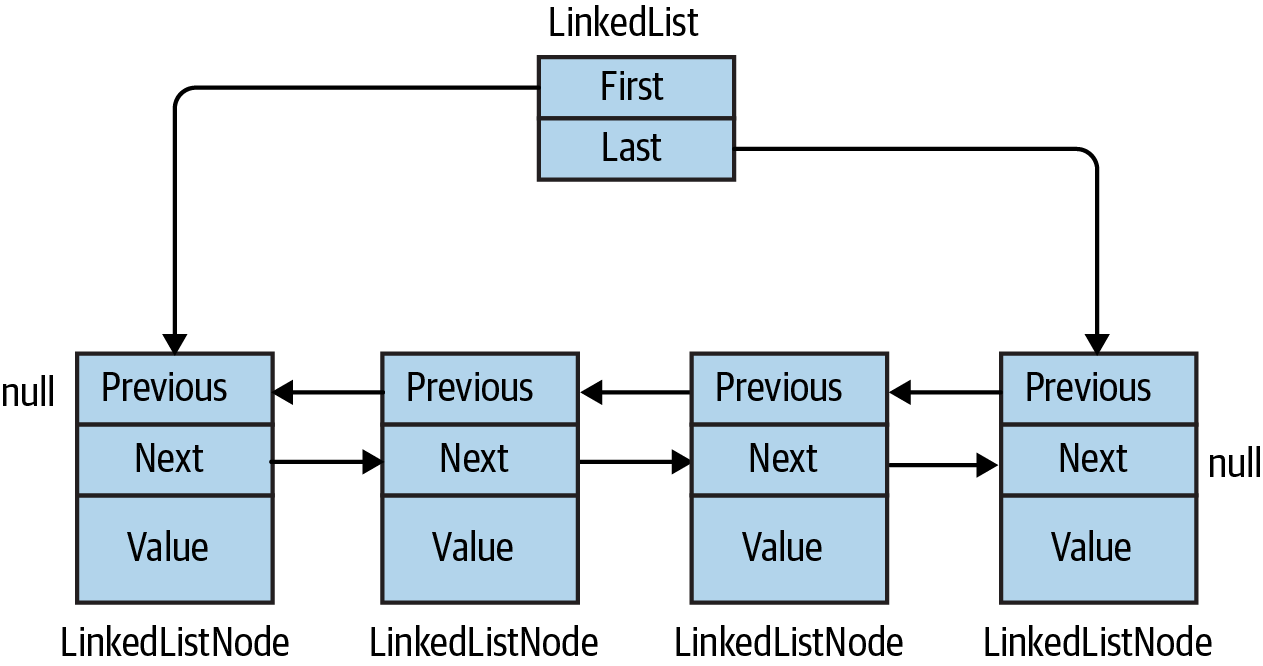

`LinkedList<T>` implements `IEnumerable<T>` and `ICollection<T>`, but not `IList<T>` because access by `index` is not supported.

In [ ]:
public sealed class LinkedListNode<T>
{
public LinkedList<T> List { get; }
public LinkedListNode<T> Next { get; }
public LinkedListNode<T> Previous { get; }
public T Value { get; set; }
}

### Queue<T> and Queue

In [ ]:
public class Queue<T> : IEnumerable<T>, ICollection, IEnumerable
{
public Queue();
public Queue (IEnumerable<T> collection); // Copies existing elements
public Queue (int capacity); // To lessen auto-resizing
public void Clear();
public bool Contains (T item);
public void CopyTo (T[] array, int arrayIndex);
public int Count { get; }
public T Dequeue();
public void Enqueue (T item);
public Enumerator<T> GetEnumerator(); // To support foreach
public T Peek();
public T[] ToArray();
public void TrimExcess();
}

In [ ]:
public class Stack<T> : IEnumerable<T>, ICollection, IEnumerable
{
public Stack();
public Stack (IEnumerable<T> collection); // Copies existing elements
public Stack (int capacity); // Lessens auto-resizing
public void Clear();
public bool Contains (T item);
public void CopyTo (T[] array, int arrayIndex);
public int Count { get; }
public Enumerator<T> GetEnumerator(); // To support foreach
public T Peek();
public T Pop();
public void Push (T item);
public T[] ToArray();
public void TrimExcess();
}

### BitArray

A `BitArray` is a dynamically sized collection of compacted `bool` values. It is more
`memory efficient` than both a `simple array` of bool and a `generic List` of bool
because `it uses only one bit for each value`, whereas the bool type otherwise occupies `one byte` for each value.

### HashSet<T> and SortedSet<T> 370

- Their Contains methods execute quickly using a hash-based lookup.
- They do not store duplicate elements and silently ignore requests to add duplicates.
- You cannot access an element by position.

`SortedSet<T>` keeps elements `in order`, whereas `HashSet<T>` does not.

In [ ]:
var hasSet = new HashSet<Moblie>();
hasSet.Add(new Moblie("09132964854"));
hasSet.Add(new Moblie("09132964854"));
Console.WriteLine(hasSet.Count);

public class Moblie
{
    public string Value { get; }

    public Moblie(string mobile)
    {
        Value = mobile;
    }

    public override bool Equals(object obj)
    {
        return obj is Moblie mobile && this.Value == mobile.Value;
    }

    public override int GetHashCode()
    {
        return Value.GetHashCode();
    }
}

### Dictionaries

A `dictionary` is a collection in which each element is a `key/value` pair.

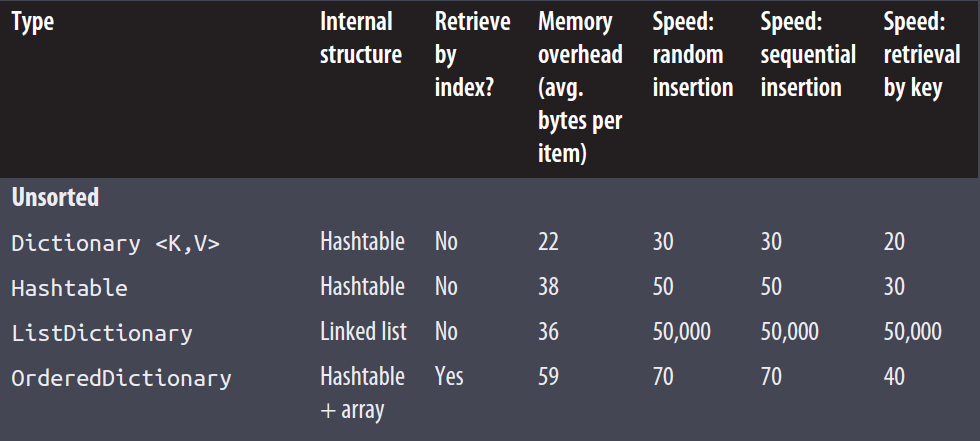

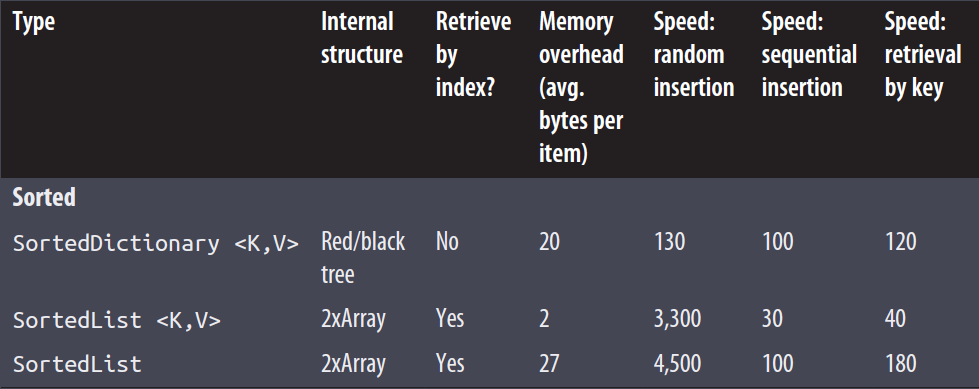

#### IDictionary<TKey,TValue>

`IDictionary<TKey,TValue>` defines the standard protocol for `all` key/value-based collections.

In [ ]:
public interface IDictionary<TKey, TValue> :
ICollection<KeyValuePair<TKey, TValue>>, IEnumerable
{
    bool ContainsKey(TKey key);
    bool TryGetValue(TKey key, out TValue value);
    void Add(TKey key, TValue value);
    bool Remove(TKey key);
    TValue this[TKey key] { get; set; } // Main indexer - by key
    ICollection<TKey> Keys { get; } // Returns just keys
    ICollection<TValue> Values { get; } // Returns just values
}

Duplicate keys are forbidden in all dictionary implementations, so calling Add twice with the same key throws an exception

#### Dictionary<TKey,TValue> and Hashtable

The nongeneric version of `Dictionary<TKey,TValue>` is called `Hashtable`.

In [ ]:
var dic = new Dictionary<int, string >();
dic.Add(1, "123456");
dic.Add(2, "12345");
dic[22] = "Two";
Console.WriteLine (dic.ContainsKey (3));        // false (fast operation)
Console.WriteLine (dic.ContainsValue ("Two")); // true (slow operation)

var hashTable = new Hashtable();
hashTable.Add(1, "12345");
hashTable.Add("123456", 1);
Console.WriteLine(hashTable.Count);


foreach (KeyValuePair<int, string> kv in dic) 
    Console.WriteLine (kv.Key + "; " + kv.Value); 

foreach (int s in dic.Keys) Console.Write (s); 

foreach (string i in dic.Values) Console.Write (i); 

In [ ]:
 public class Dictionary<TKey, TValue> : 
    IDictionary<TKey, TValue>, 
    IDictionary, 
    IReadOnlyDictionary<TKey, TValue>, 
    ISerializable, 
    IDeserializationCallback where TKey : notnull
 {}

A dictionary can work with keys of `any type`, providing it’s able to determine
`equality` between keys and obtain `hashcodes`.

By default, equality is determined via the key’s `object.Equals` method, and the pseudo-unique hashcode is obtained via the key’s `GetHashCode` method.

we can improve the `performance` by `specifying size` of collection.

### OrderedDictionary

An OrderedDictionary is a nongeneric dictionary that maintains elements in the `same order` that they were `added`. With an `OrderedDictionary`, you can access elements both by `index` and by `key`.

#### Sorted Dictionaries

The .NET BCL provides two dictionary classes internally structured such that their
content is always sorted by key:  
- `SortedDictionary<TKey,TValue>`
- `SortedList<TKey,TValue>`

### Collection<T> and CollectionBase 

The `Collection<T>` class is a customizable `wrapper` for `List<T>`.

<div dir="rtl">
 <code>Collection<T></code> عملکردهای اساسی List<T> را فراهم می‌کند، اما طوری طراحی شده است که بتوان آن را برای نیازهای خاص بیشتر سفارشی کرد.
</div>

In [ ]:
public class Collection<T> :
IList<T>, ICollection<T>, IEnumerable<T>, IList, ICollection, IEnumerable
{
// ...
protected virtual void ClearItems();
protected virtual void InsertItem (int index, T item);
protected virtual void RemoveItem (int index);
protected virtual void SetItem (int index, T item);
protected IList<T> Items { get; }
}

In [ ]:
using System.Collections.ObjectModel;

public class MyCollection : Collection<int>
{
    protected override void InsertItem(int index, int item)
    {
        // منطق سفارشی قبل از افزودن عنصر
        base.InsertItem(index, item);
        // منطق سفارشی بعد از افزودن عنصر
    }

    protected override void RemoveItem(int index)
    {
        // منطق سفارشی قبل از حذف عنصر
        base.RemoveItem(index);
        // منطق سفارشی بعد از حذف عنصر
    }
}


<div dir="rtl">زمانی از Collection به جای List استفاده میکنیم که بخواهیم منطق خاصی را در هنگاهم اضافه یا حذف کردن یک ایتم به لیست اضافه کنیم، شاید بهترین مثال آن در روابط پدر و فرزندی در DDD است. </div>

#### KeyedCollection<TKey,TItem>

<div dir="rtl">
نوعی کلکشن است که اجازه می‌دهد داده‌ها با استفاده از کلید‌های یکتا مدیریت شوند. این کلاس از Collection<T> ارث‌بری می‌کند و امکاناتی را فراهم می‌آورد که هم کارایی یک لیست و هم یک دیکشنری را دارد. درواقع، KeyedCollection<TKey, TItem> داده‌ها را به صورت یک لیست ذخیره می‌کند اما همچنین یک دیکشنری از کلیدها را نگهداری می‌کند تا دسترسی سریع به عناصر بر اساس کلید فراهم آید.
</div>

In [ ]:
using System;
using System.Collections.ObjectModel;

public class MyKeyedCollection : KeyedCollection<int, MyItem>
{
    protected override int GetKeyForItem(MyItem item)
    {
        // فرض کنید که MyItem دارای یک Property به نام Id است که به عنوان کلید استفاده می‌شود
        return item.Id;
    }
}

public class MyItem
{
    public int Id { get; set; }
    public string Name { get; set; }
}

public class Program
{
    public static void Main()
    {
        var myCollection = new MyKeyedCollection();
        myCollection.Add(new MyItem { Id = 1, Name = "Item 1" });
        myCollection.Add(new MyItem { Id = 2, Name = "Item 2" });

        // دسترسی به عنصر با کلید
        var item = myCollection[1];
        Console.WriteLine(item.Name); // نمایش: Item 1
    }
}


#### ReadOnlyCollection<T>

ReadOnlyCollection<T> is a `wrapper`, or `proxy`, that provides a read-only view of a
`collection`. This is useful in allowing a class to publicly `expose read-only access` to a collection that the class can `still update internally`.

In [ ]:
using System;
using System.Collections.Generic;
using System.Collections.ObjectModel;

public class Program
{
    public static void Main()
    {
        List<int> numbers = new List<int> { 1, 2, 3, 4, 5 };
        ReadOnlyCollection<int> readOnlyNumbers = new ReadOnlyCollection<int>(numbers);

        // نمایش داده‌ها
        foreach (var num in readOnlyNumbers)
        {
            Console.WriteLine(num);
        }

        // تلاش برای افزودن یا حذف داده‌ها منجر به خطا خواهد شد
        // readOnlyNumbers.Add(6); // این خط کامپایل نخواهد شد
        // readOnlyNumbers.RemoveAt(0); // این خط کامپایل نخواهد شد

        // تغییرات در لیست اصلی
        numbers.Add(6);
        Console.WriteLine("Updated Read-Only Collection:");
        foreach (var num in readOnlyNumbers)
        {
            Console.WriteLine(num); // خروجی شامل عدد 6 خواهد بود
        }
    }
}


### Immutable Collections

`Restricting` the ability to `write (mutate)` a collection—or any other object— `simplifies` software and `reduces bugs`.

The `immutable collections` `extend this principle`, by providing collections that cannot be modified at all after initialization. Should you need to add an item to an immutable collection, `you must instantiate a new collection`, leaving the old one untouched.

Immutability is a hallmark of `functional programming`  

  
below shown types are define in System.Collections.Immutable

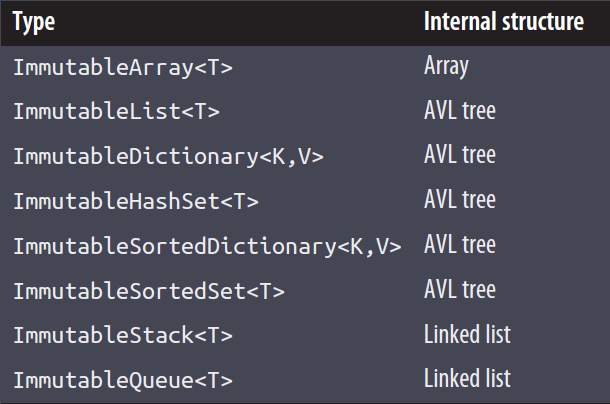

The immutable collections expose a public interface `similar` to their mutable counterparts. The `key difference` is that the methods that appear to alter the collection `(such as Add or Remove)` don’t alter the original collection; instead they `return` a `new collection` with the `requested item added or removed`.

#### Creating Immutable Collections

In [ ]:
using System.Collections.Immutable;

ImmutableArray<int> array = ImmutableArray.Create<int> (1, 2, 3);

#### Builders

In [ ]:
using System.Collections.Immutable;

ImmutableArray<int>.Builder builder = ImmutableArray.CreateBuilder<int>();
builder.Add (1);
builder.Add (2);
builder.Add (3);
builder.RemoveAt (0);
ImmutableArray<int> myImmutable = builder.ToImmutable();

var builder2 = myImmutable.ToBuilder();
builder2.Add (4); // Efficient
builder2.Remove (2); // Efficient


### Plugging in Equality and Order

standard .NET protocols that make a type `equatable`, `hashable`, and `comparable`.  

- A type for which `Equals` and `GetHashCode` return meaningful results can be used as a key in a `Dictionary` or `Hashtable`.
- A type that implements `IComparable /IComparable<T>` can be used as a `key` in any of the `sorted` dictionaries or lists.

The plug-in protocols consist of the following interfaces:  
  
`IEqualityComparer` and `IEqualityComparer<T>`
- Performs plug-in `equality comparison` and `hashing`
- Recognized by `Hashtable` and `Dictionary`
  
`IComparer` and `IComparer<T>`  
- Performs plug-in `order comparison`
- Recognized by the `sorted dictionaries` and `collections`; also, `Array.Sort`

#### IEqualityComparer and EqualityComparer

for `hashtable-base dictionray` we need answer to two questions
- Is it the `same` as another?
- What is its `integer hashcode`?

In [ ]:
public interface IEqualityComparer<T>
{
   bool Equals (T x, T y);
   int GetHashCode (T obj);
}

In [ ]:
public abstract class EqualityComparer<T> : IEqualityComparer,
IEqualityComparer<T>
{
public abstract bool Equals (T x, T y);
public abstract int GetHashCode (T obj);

bool IEqualityComparer.Equals (object x, object y);
int IEqualityComparer.GetHashCode (object obj);

public static EqualityComparer<T> Default { get; }
}

In [ ]:
Customer c1 = new Customer ("Bloggs", "Joe");
Customer c2 = new Customer ("Bloggs", "Joe");

Console.WriteLine (c1 == c2); // False
Console.WriteLine (c1.Equals (c2)); // False

var d = new Dictionary<Customer, string>();
d [c1] = "Joe";
Console.WriteLine (d.ContainsKey (c2)); // False

var eqComparer = new LastFirstEqComparer();
var dd = new Dictionary<Customer, string> (eqComparer);
dd [c1] = "Joe";
Console.WriteLine (dd.ContainsKey (c2)); // True


public class Customer
{
    public string LastName;
    public string FirstName;
    public Customer(string last, string first)
    {
        LastName = last;
        FirstName = first;
    }
}
public class LastFirstEqComparer : EqualityComparer<Customer>
{
    public override bool Equals(Customer x, Customer y)
    => x.LastName == y.LastName && x.FirstName == y.FirstName;
    public override int GetHashCode(Customer obj)
    => (obj.LastName + ";" + obj.FirstName).GetHashCode();
}




#### IComparer and Comparer

In [ ]:
public interface IComparer <in T>
{
int Compare(T x, T y);
}

In [ ]:
public abstract class Comparer<T> : IComparer, IComparer<T>
{
public static Comparer<T> Default { get; }
public abstract int Compare (T x, T y); // Implemented by you
int IComparer.Compare (object x, object y); // Implemented for you
}

#### StringComparer

StringComparer is a `predefined plug-in` class for equating and comparing strings,
allowing you to specify language and case sensitivity.

StringComparer implements `both` `IEqualityComparer` and `IComparer` (and their generic versions),

In [ ]:
public static StringComparer CurrentCulture { get; }
public static StringComparer CurrentCultureIgnoreCase { get; }
public static StringComparer InvariantCulture { get; }
public static StringComparer InvariantCultureIgnoreCase { get; }
public static StringComparer Ordinal { get; }
public static StringComparer OrdinalIgnoreCase { get; }
public static StringComparer Create (CultureInfo culture,
bool ignoreCase);

In [ ]:
var dict = new Dictionary<string, int> (StringComparer.OrdinalIgnoreCase);

string[] names = { "Tom", "HARRY", "sheila" };
CultureInfo ci = new CultureInfo ("en-AU");
Array.Sort<string> (names, StringComparer.Create (ci, false));

#### IStructuralEquatable and IStructuralComparable